
Mount google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import libary yang dibutuhkan


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Load dataset dari folder


In [ ]:
train_dir = '/content/drive/MyDrive/dataset_sampah' # Correct path to your dataset
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 4773 images belonging to 3 classes.
Found 1192 images belonging to 3 classes.


Generate data training dan validasi

arsitektur CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),                     # Input layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),        # Convolution layer
    tf.keras.layers.MaxPooling2D(2,2),                           # Pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),        # Conv layer lagi
    tf.keras.layers.MaxPooling2D(2,2),                           # Pooling
    tf.keras.layers.Flatten(),                                  # Ubah 2D ke 1D
    tf.keras.layers.Dense(64, activation='relu'),               # Hidden layer
    tf.keras.layers.Dense(3, activation='softmax')              # Output: 3 kelas
])


compile dan latih model

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data
)


Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 45s 148ms/step - accuracy: 0.9845 - loss: 0.0571 - val_accuracy: 0.8129 - val_loss: 0.8618
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 80s 140ms/step - accuracy: 0.9857 - loss: 0.0427 - val_accuracy: 0.8138 - val_loss: 1.2052
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 46s 153ms/step - accuracy: 0.9885 - loss: 0.0445 - val_accuracy: 0.8255 - val_loss: 1.0297
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 54s 181ms/step - accuracy: 0.9951 - loss: 0.0210 - val_accuracy: 0.8339 - val_loss: 1.0481
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.9964 - loss: 0.0172 - val_accuracy: 0.8213 - val_loss: 0.9210
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.7844 - val_loss: 1.6370
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 46s 152ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.7945 - val_loss: 1.0917
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 42s 140ms/step - accuracy: 0.9929 - loss: 0

Tampilkan hasil training

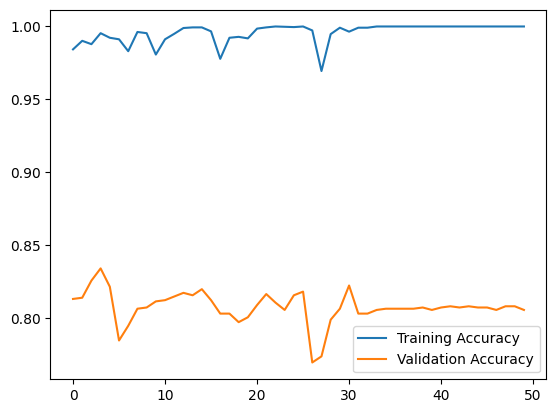

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()


prediksi gambar baru

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/drive/MyDrive/dataset_sampah/logam/R_1623.jpg', target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
class_names = list(train_data.class_indices.keys())
print("Prediksi:", class_names[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediksi: logam


In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import PIL.Image
import io
import cv2
import numpy as np

# Fungsi untuk membuka kamera
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📷 Ambil Foto';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Wait for capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getTracks().forEach(track => track.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    takePhoto({quality: %s});
    ''' % quality)

  data = eval_js(js)
  binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
  img = PIL.Image.open(binary)
  img.save(filename)
  return filename

# Ambil foto
from base64 import b64decode
filename = take_photo()
print('Foto disimpan sebagai', filename)


TypeError: <IPython.core.display.Javascript object> is not JSON serializable